### Worked with Marc Suda

### Linear Regression

In this homework we will walk through how to do linear regression from scratch using numpy.

**Due 3/7** 
#### Part 1
The first thing we need to do is implement the standard error measures used in regression.  You can find the definitions of _Mean Absolute Error_ (MAE) and _Root Mean Squared Error_ (RMSE) [here](https://www.dataquest.io/blog/understanding-regression-error-metrics/).  The definition of the Coefficient of Determination (R2) can be found [here](https://en.wikipedia.org/wiki/Coefficient_of_determination).  Implement them in the following cell. 


In [19]:
def MAE(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    mae= (np.sum(np.absolute(g-y))) / len(y)
    print(mae)
    return mae
    

def RMSE(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    rmse = (np.sum(np.square(np.absolute(g-y)))) / len(y)
    print(np.sqrt(rmse))
    return np.sqrt(rmse)
    
def R2(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    yhat = (np.sum(y)) / len(y)
    SStot = np.sum(np.square(g-yhat))
    SSres = np.sum(np.square(y - g))
    R2 = 1 - (SSres / SStot)
    print(R2)
    return R2


In [20]:
print("hi")

hi


### Make some data

Now we'll create some artificial data to practice on.  We're generating the data by adding noise to the usual square root function.  The noise is sampled from a normal distribution.


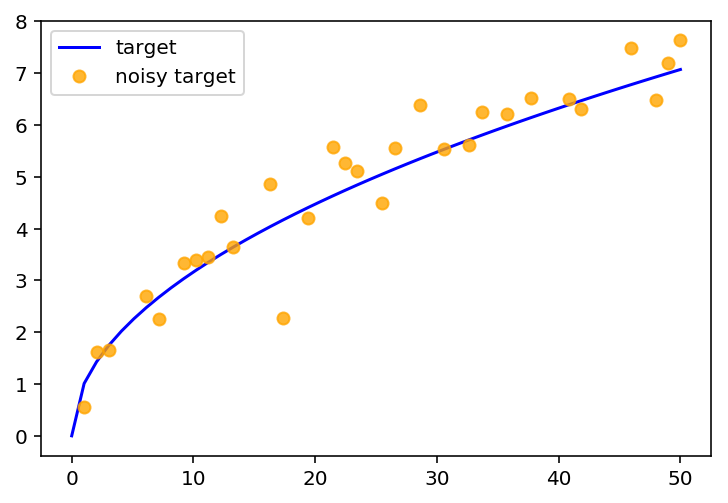

In [21]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0,50,50) ## The domain
N = 30   ## 30 sample points
np.random.seed(22)  # so we get the same random stuff
shuff = np.random.permutation(len(x))
x_pts = sorted(x[shuff][:N])  ## Pick N points at random from the domain

f = np.sqrt   #The target function (no noise yet)

sigma = 1/2
noise = np.random.randn(N)*sigma  ## Noise sampled from the normal distribution with sd=sigma

f_noisy = f(x_pts) + noise   ## Noisy data

plt.plot(x,f(x),label="target",c='blue')
plt.plot(x_pts,f_noisy,'o',label="noisy target",alpha=0.8,c='orange')
plt.legend()
plt.show()

### Fitting and predicting

#### Part 2

Now implement the two functions below.  The `linear_fit` function returns the weight vector `w` found by the linear regression learning algorithm.  Please implement the version that uses the normal equations.  You can find the definition of the normal equations (and their derivation) many places online or in the book.  [Here](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/) is an example (they use $\theta$ for what we call $w$).  Another example is given in the PDF I included with this homework.  Note that numpy can compute the pseudo-inverse directly with `np.linalg.pinv(X)`.

In [22]:
def linear_fit(X,y):
    #Xt = np.transpose(X)
    #XXt = Xt.dot(X)
    #XXti = np.linalg.pinv(XXt)
    #Xty = Xt.dot(y)
    #normaleq = XXti.dot(Xty)
    return np.linalg.pinv(X).dot(y)
    
    return normaleq

def linear_predict(X,w):
    """Returns a vector of predictions g where g[i] is the prediction for the ith row of X"""
    #for i in X:
    w = np.array(w)
    g = w.dot(np.transpose(X))
    return g
    
    


### Check your work

Now you can check the correctness of the code you wrote.  

The output should look something like this:

![fig](part2.png)

0.5205314372175049
0.6762039590656788
0.8488080437624599


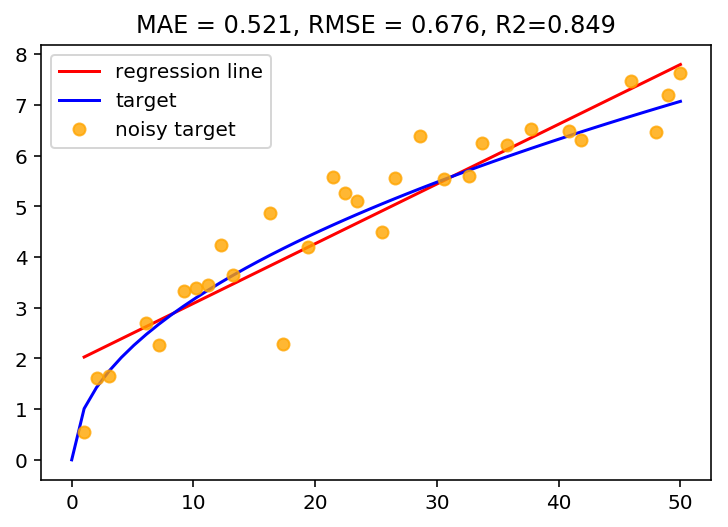

In [23]:
# Work check

X = np.ones(N*2).reshape(N,2)
X[:,1] = x_pts
y = f_noisy

w = linear_fit(X,y)
g = linear_predict(X,w)


plt.plot(x_pts,g,label="regression line",c='red')
plt.plot(x,f(x),label="target",c='blue')
plt.plot(x_pts,f_noisy,'o',label="noisy target",alpha=0.8,c='orange')
plt.title(f"MAE = {MAE(g,y):0.3}, RMSE = {RMSE(g,y):0.3}, R2={R2(g,y):0.3}")

plt.legend()

plt.show()

### What's so linear about it?

An important thing to understand about linear regression is that it is linear _in the weights_ not in the data.

Linear regression finds the `w` that minimizes the mean squared error of `g = X.dot(w)` and `y`.  This says nothing about what the columns of `X` are.  They could in fact be _non-linear_ functions of the data.  

### Part 3

Create a new `X` which is like the above `X` but which has a 3rd column.  The 3rd column should be the square root of the first column (`np.sqrt()`).  Then rerun `linear_fit`, `linear_predict`, and your error metrics.  Did the error go down?  What would you expect the weight vector to look like now?

### Compared to the X without the third column, the error went down across the board. I expect the weight vector to look more accurate and have three weights. This accuracy causes the graph to curve similar to the target.

### Work check

You can check your work on Part 3 by running the code below.  The output should look like this:

![img](party3.png)

0.38742439221155683
0.5457401691655803
0.9064518333209517


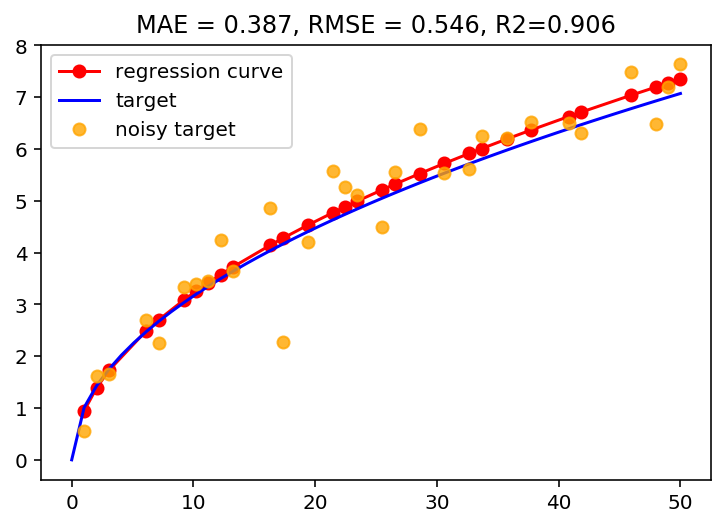

In [24]:
## Work check
X = np.ones(N*3).reshape(N,3)
x_pts = np.array(x_pts)
X[:,1] = np.sqrt(x_pts)


y = f_noisy


w = linear_fit(X,y)
g = linear_predict(X,w)


plt.plot(x_pts,g,label="regression curve",c='red',marker='o')
plt.plot(x,f(x),label="target",c='blue')
plt.plot(x_pts,f_noisy,'o',label="noisy target",alpha=0.8,c='orange')
plt.legend()
plt.title(f"MAE = {MAE(g,y):0.3}, RMSE = {RMSE(g,y):0.3}, R2={R2(g,y):0.3}")
plt.savefig("party3.png")
plt.show()

### Polynomial models

Lets experiment with using polynomial models to fit the data.  

The code below will fit some synthetic data with polynomials of degree 1,4,7,10 and 13.

#### Part 4

a. Which polynomial has the best R2 score (closest to 1)?
The third polynomial had the best score being .70.
2 7
0.27120427313785916
0.3240372590603515
0.7048045465266144


b. Which degree polynomial would you expect to generalize the best to new data points?
According to the data, I expect the polynomial with degree 7 will generalize the best to new data points.

0 1
0.5220382038810902
0.5884945699583383
-inf
1 4
0.49938972759967204
0.5800046924916813
-3.718186691451054
2 7
0.2712041954016327
0.3240372590576123
0.7048046126860095
3 10
0.21819876482442216
0.2955313541621124
0.8346967510408949
4 13
0.11730350097731138
0.16400308925611817
0.9200402740951893


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars


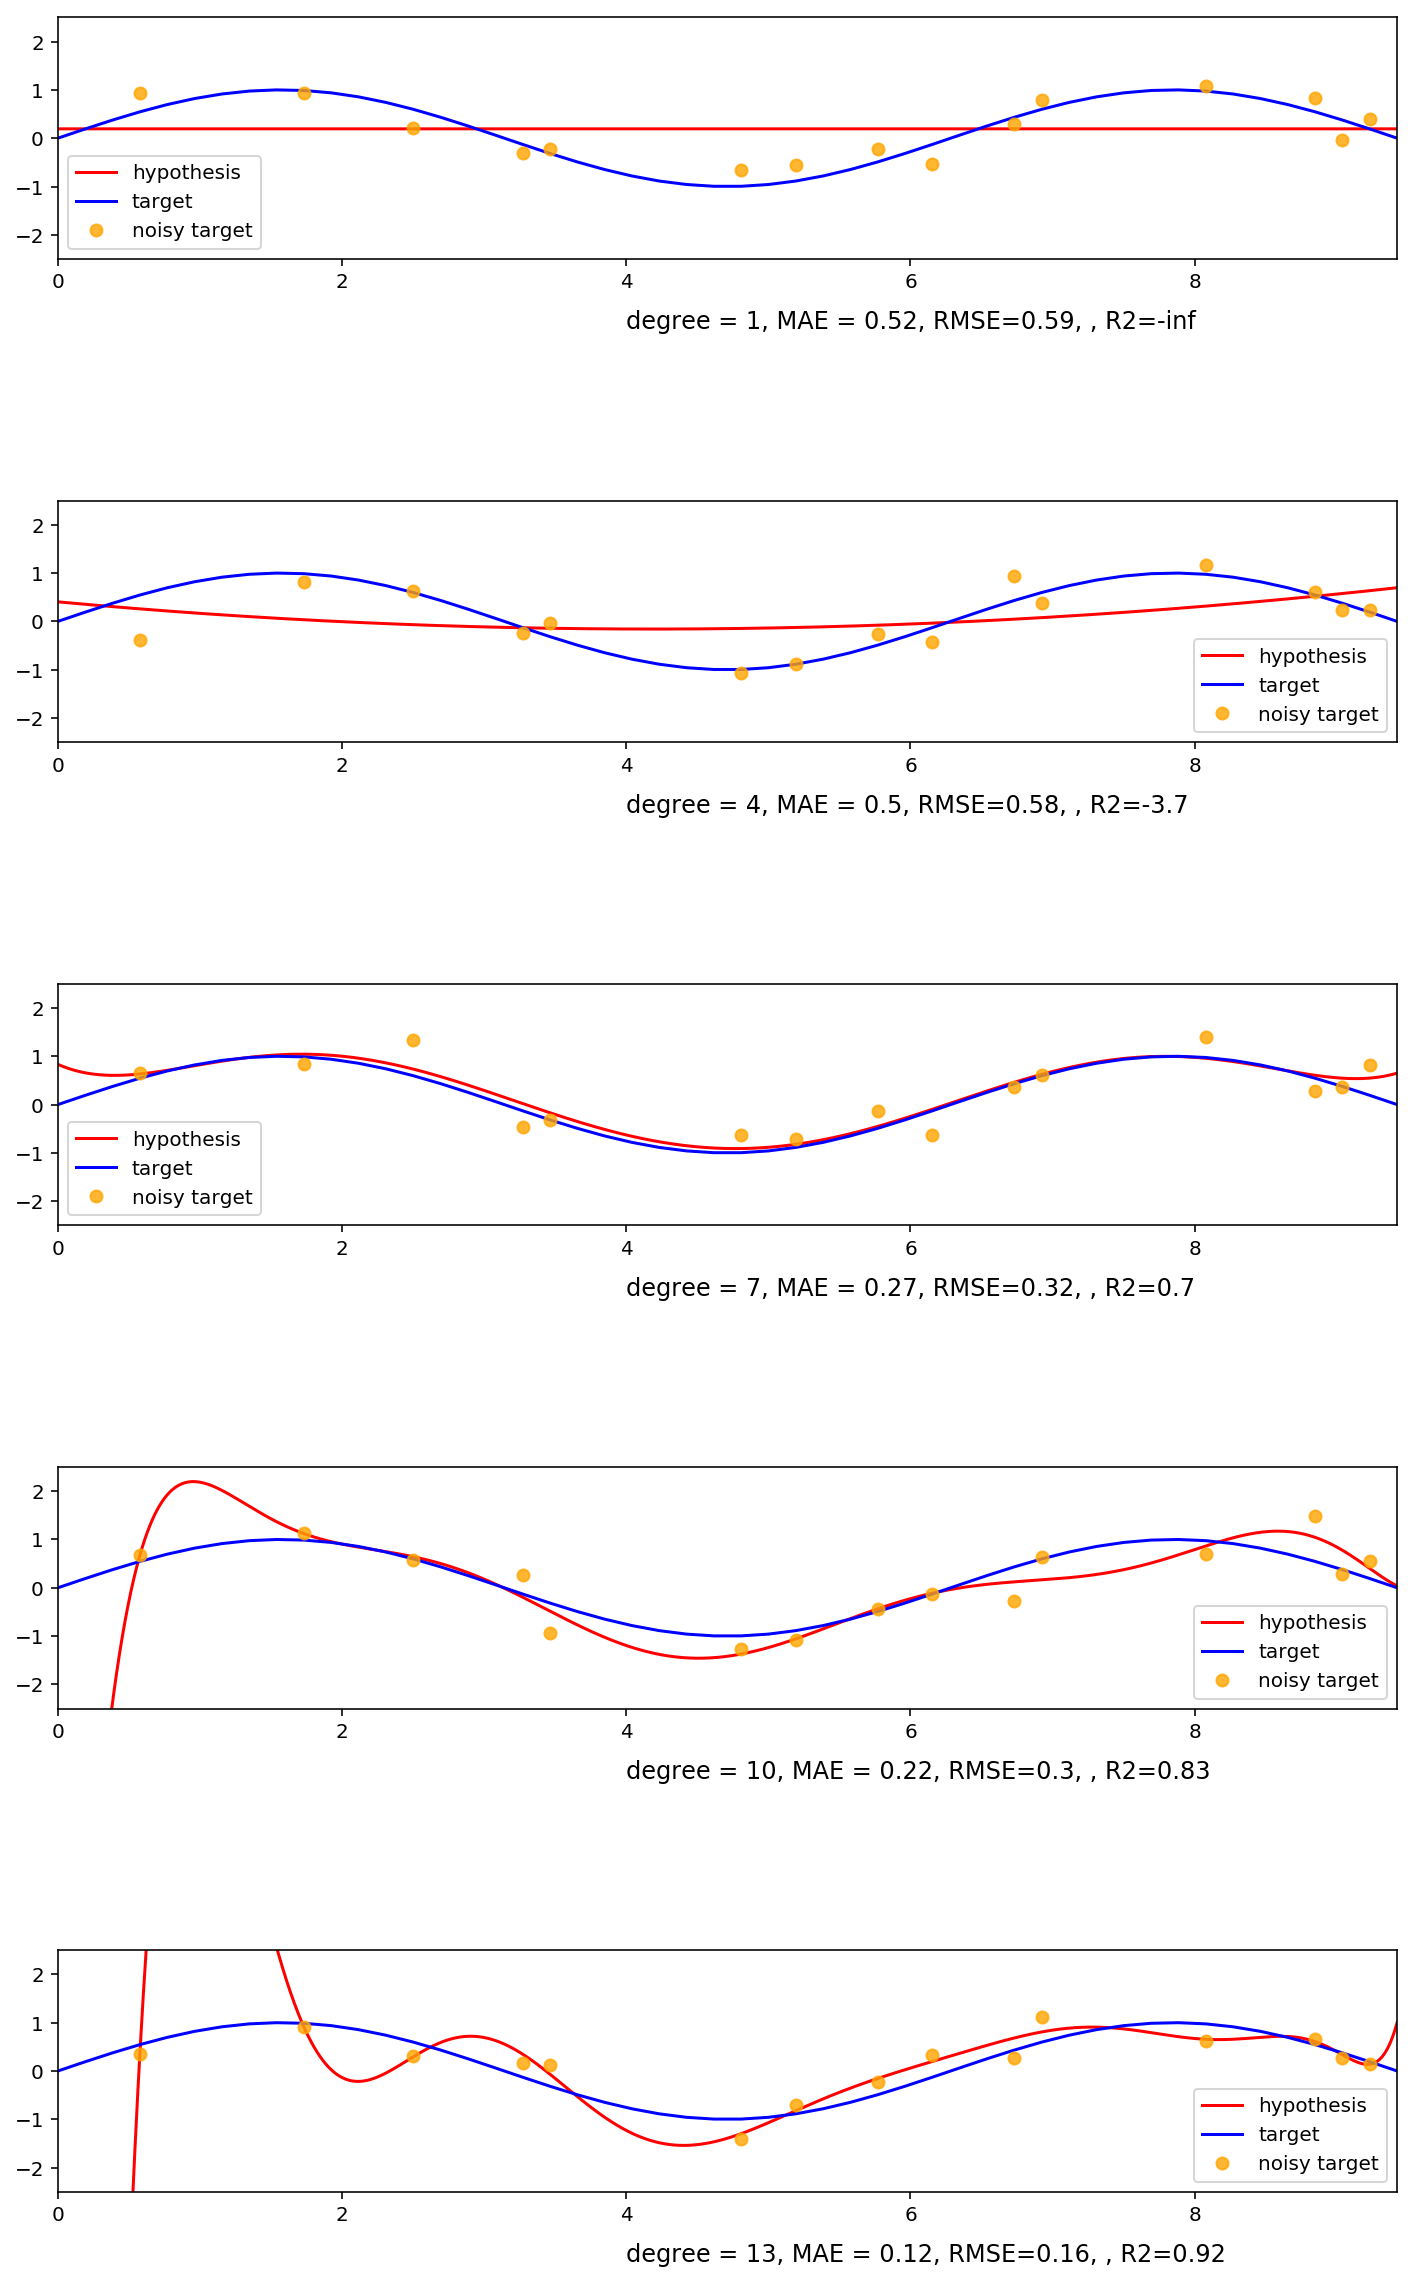

In [25]:
x = np.linspace(0,3*np.pi,50)
N = 15
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

numfigs = 5
fig,axes = plt.subplots(5,1,figsize=(12,4*numfigs))

plt.subplots_adjust(hspace=1)

wt_by_deg = dict()

for i,deg in enumerate(range(1,numfigs*3+1,3)):
    print(i,deg)
    X = np.ones(N*deg).reshape(N,deg)
    for j in range(1,deg):
        X[:,j] = x_pts**j


    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/3

    
    w = linear_fit(X,y)
    g = linear_predict(X,w)


    wt_by_deg[deg] = tuple(w)
    
    xx = np.linspace(0,np.pi*3,10000)
    h = np.zeros(len(xx))
    for j in range(deg):
        h += w[j]*xx**j

    axes[i].plot(xx,h,label="hypothesis",c='red')

    axes[i].plot(x,np.sin(x),label="target",c='blue')
    axes[i].plot(x_pts,y,'o',label="noisy target",alpha=0.8,c='orange')
    axes[i].legend()
    ymax = 2.5
    ymin = -2.5
    axes[i].axis([0,3*np.pi,ymin,ymax])

    text = axes[i].text(4,ymin-1.3,f"degree = {deg}, MAE = {MAE(g,y):0.2}, RMSE={RMSE(g,y):0.2}, , R2={R2(g,y):0.2}", size=12, 
    verticalalignment='center')
plt.show()

### Checking out of sample error

Now we examine the polynomials that were learned on the "orange" points shown above, and see how they do on new points (in purple) drawn from the same distribution.

#### Part 5

a.  Which polynomial does the best on the new data?

The third polynomial does the best on the new data, almost matching the curve.


b.  Which polynomial does the worst?

The first polynomial does the worst on the data because it's just a straight line.

c.  Why did the high degree polynomial not do well on new data?

The higher degree polynomial did not do well on the new data because it was a higher degree polynomial than what was required.

0.5317531016550345
0.6296632435787711
-14.98431587595039
0.6012750029399356
0.6654547275276935
-1.816909063413013
0.29274388182108807
0.32540573625573865
0.6393244802557488
0.5881817123376921
0.8759301933196093
0.41751572356345557
2.1541208907068525
4.377543429221674
0.07756966356107953


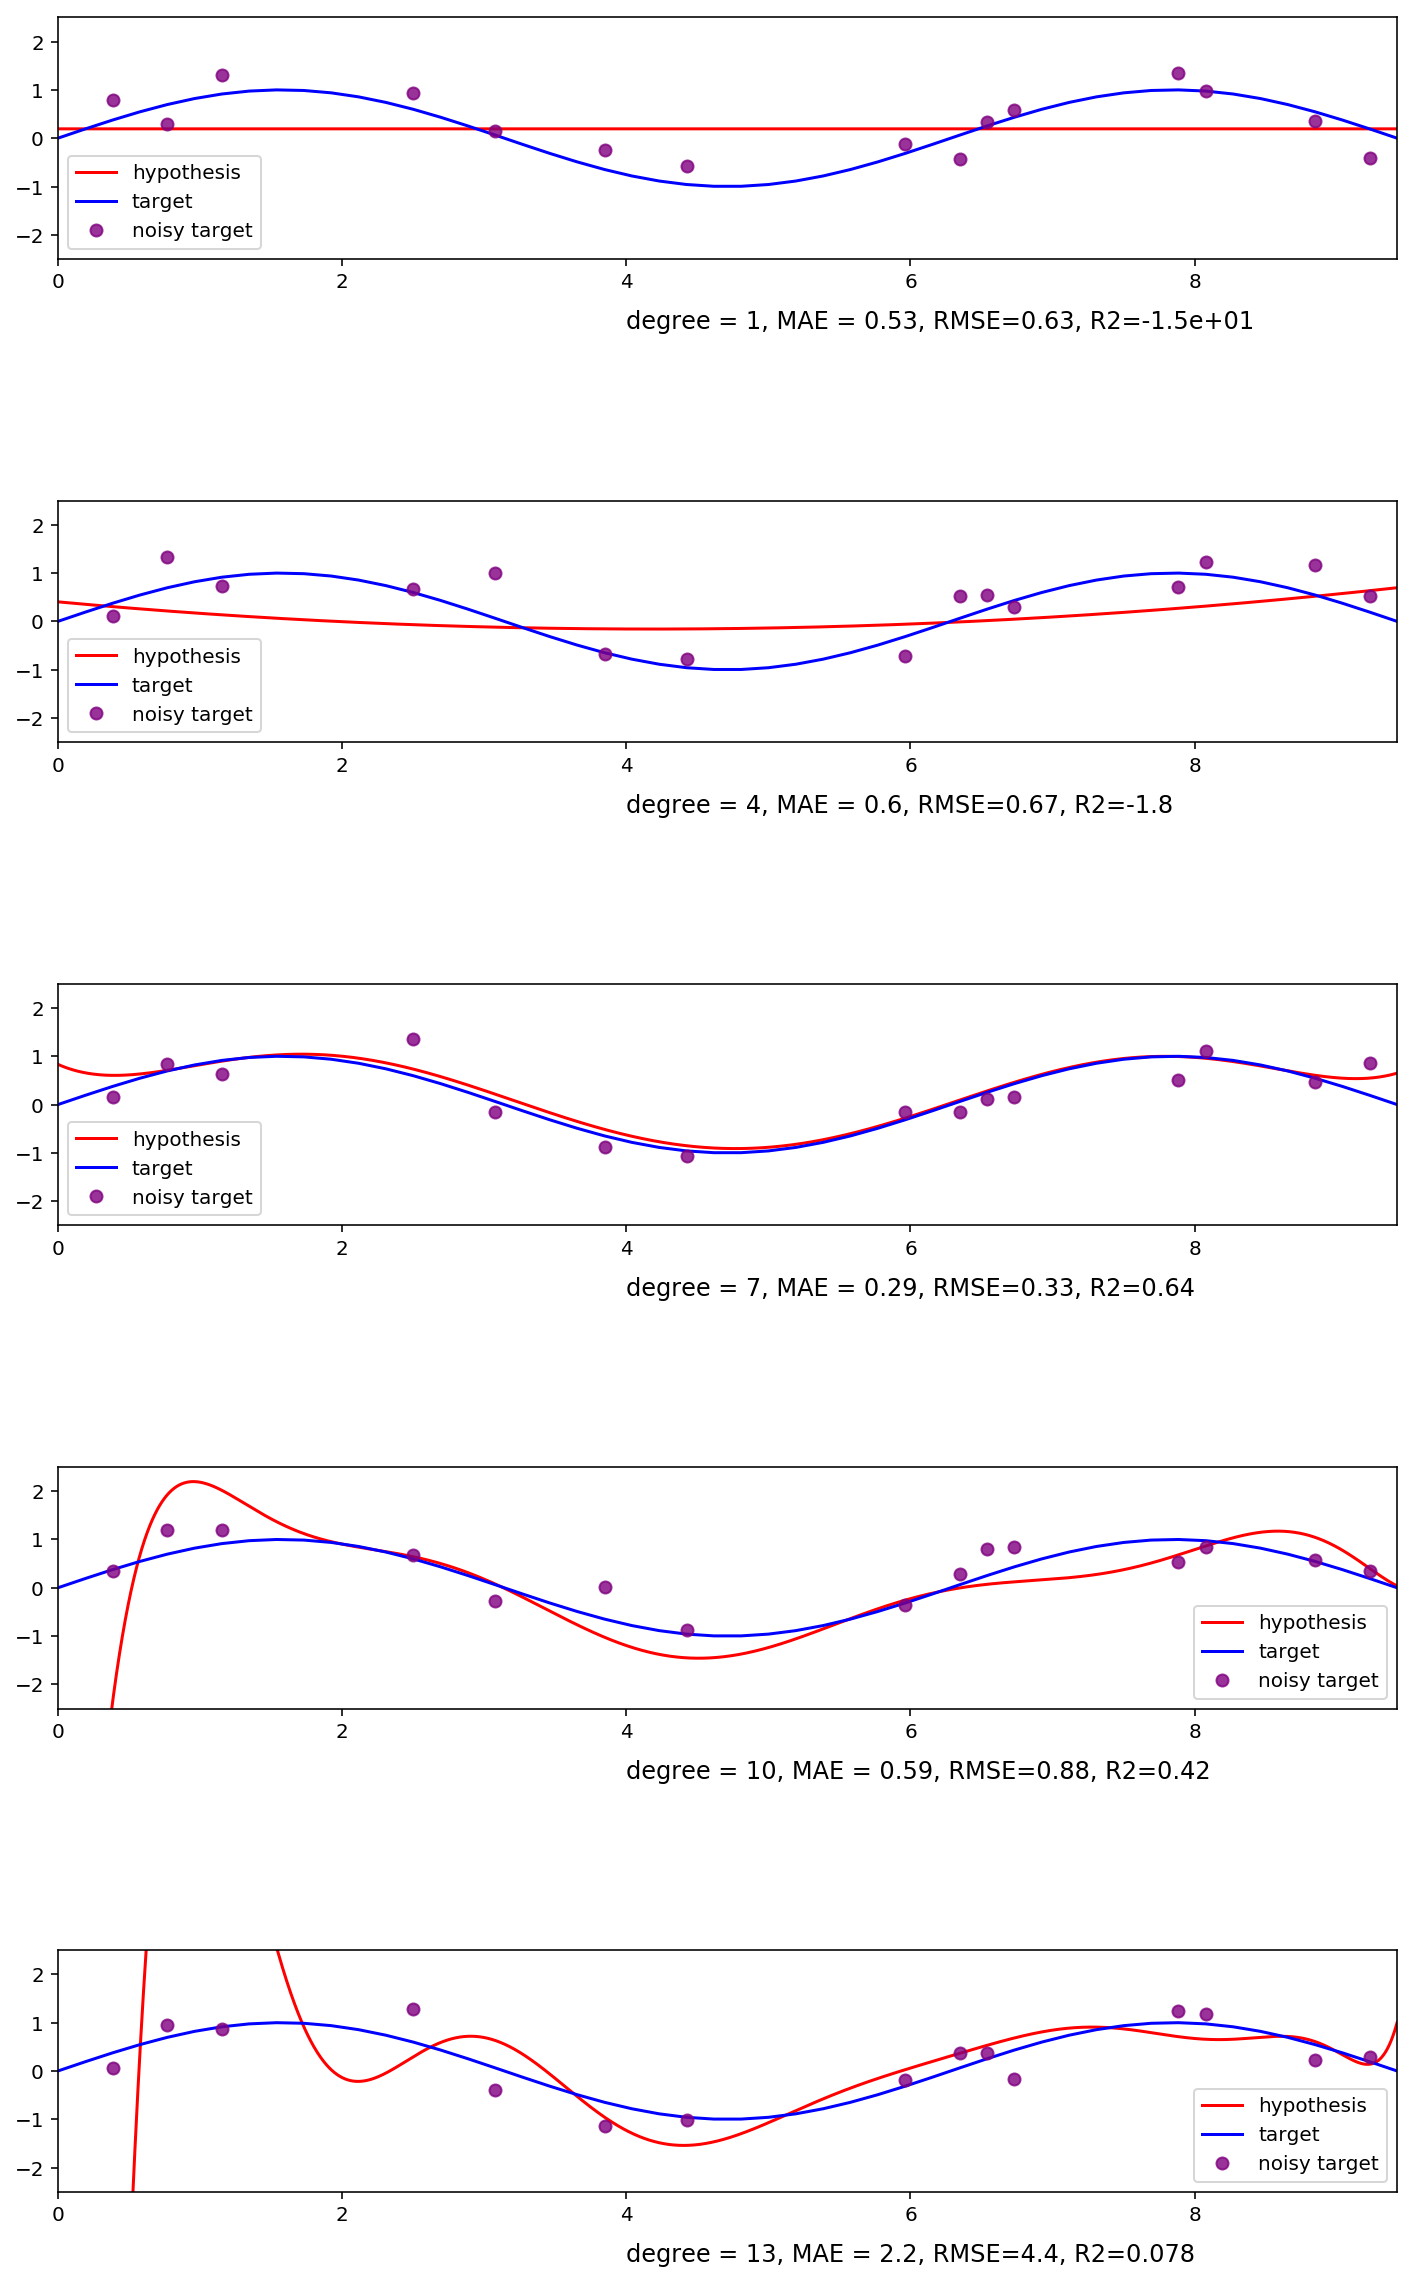

In [26]:
x = np.linspace(0,3*np.pi,50)
N = 15
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

numfigs = 5
fig,axes = plt.subplots(5,1,figsize=(12,4*numfigs))

plt.subplots_adjust(hspace=1)


for i,deg in enumerate(range(1,numfigs*3+1,3)):
    X = np.ones(N*deg).reshape(N,deg)
    for j in range(1,deg):
        X[:,j] = x_pts**j


    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/3

    w = wt_by_deg[deg]


    g = linear_predict(X,w)

    xx = np.linspace(0,np.pi*3,10000)
    h = np.zeros(len(xx))
    for j in range(deg):
        h += w[j]*xx**j

    axes[i].plot(xx,h,label="hypothesis",c='red')

    axes[i].plot(x,np.sin(x),label="target",c='blue')
    axes[i].plot(x_pts,y,'o',label="noisy target",alpha=0.8,c='purple')
    axes[i].legend()
    ymax = 2.5
    ymin = -2.5
    axes[i].axis([0,3*np.pi,ymin,ymax])

    text = axes[i].text(4,ymin-1.3,f"degree = {deg}, MAE = {MAE(g,y):0.2}, RMSE={RMSE(g,y):0.2}, R2={R2(g,y):0.2}", size=12, 
    verticalalignment='center')
plt.show()

#### Part 6

Below is part of a function that produces a test/train split on a dataset $\mathcal{D}$.

Fill in the missing parts of the function in the following way using array slicing.

`X_train` should be the first "`cutoff`" many elements in the shuffled matrix `X2`. 

`X_test` should be the remaining elements in `X2`.

`y_train` should be the first "`cutoff`" many elements in the shuffled matrix `y2`. 

`y_test` should be the remaining elements in `y2`. 

In [27]:
def test_train_split(X,y,train_percent=0.8,rand_seed=42):
    np.random.seed(rand_seed)
    cutoff = int(train_percent*X.shape[0])
    shuff = np.random.permutation(X.shape[0])
    X2 = X[shuff]
    y2 = y[shuff]
   ##### Your code
    X_train = X2[:cutoff]
    X_test = X2[cutoff:]
    y_train = y2[:cutoff]
    y_test = y2[cutoff:]
    
    return X_train,X_test,y_train,y_test

#### Part 7

Suppose we have a dataset $\mathcal{D}$ in a regression problem.  

1. What will happen to the in-sample error of linear regression using polynomials of degree $d$ as $d \to \infty$?

The in-sample error will go down as the degree of the polynomial increases. This is because the algorithm can just place a 0 in front of each unnecessary variable. However, in our case it seems that when the degree is too high, the in-sample error will increase.

2. What will happen to the out-of-sample error of linear regression as $d$ increases?

While degree increases, the out-of-sample error will INCREASE because the algorithm has to process more data, unless it hits the target degree. It increases exponentially when the degree is too high in our case.

You can use the output of the code below to help you form your answer.

In [28]:
xmin,xmax = 0,4*np.pi
x = np.linspace(xmin,xmax,1000)
D = 14

N = 100
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

K = 200
train_vals = np.zeros(D*K).reshape(K,D)
test_vals = np.zeros(D*K).reshape(K,D)
noise = np.random.randn(N)
y = np.sin(x_pts)+ noise/7

for k in range(K):
    shuff = np.random.permutation(len(x))
    x_pts = np.array(sorted(x[shuff][:N]))
    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/7
    for i,deg in enumerate(range(D)):
        X = np.ones(N*deg).reshape(N,deg)
        for j in range(1,deg):
            X[:,j] = x_pts**j
        X_train,X_test,y_train,y_test = test_train_split(X,y,0.13)

        w = linear_fit(X_train,y_train)

        g_train = linear_predict(X_train,w)
        g_test = linear_predict(X_test,w)

        r_train = RMSE(g_train,y_train)
        r_test = RMSE(g_test,y_test)
        train_vals[k][i] = r_train
        test_vals[k][i] = r_test

tr_vals = np.mean(train_vals,axis=0)
te_vals = np.mean(test_vals,axis=0)

plt.plot(range(D),tr_vals)
plt.title("In sample error as a function of model complexity")
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")
plt.show()
plt.title("Out of sample error as a function of model complexity")
plt.plot(range(D),te_vals)
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")

plt.axis([0,D,0,2])
plt.show()

0.6218540070954657
0.730360917762654
0.6214649331055463
0.7337785485191153
0.542506883039187
0.6756051690031267
0.5319807659172221
0.6774401367087312
0.5318618358444703
0.6693039916885167
0.30808653541148523
2.5329867692438475
0.2538089806753258
0.5766065962550675
0.1207747932007735
7.328107996952144
0.11440233010112509
4.381877057612696
0.10630220030903285
2.1335861823924027
0.10601613860458232
6.86179788548386
0.10593420359024014
13.904097451159394
0.07469754114291673
360.2891833290241
0.06397715573625994
1528.307284964083
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332691
0.6593339710097688
0.47635801248218496
0.6559137404630054
0.4589565682727874
0.6048781626743633
0.29111589154235196
1.6981140901130631
0.16699389813445153
0.29134033586607194
0.08061284384223012
3.121316771287317
0.0596102043464065
1.0081139179319945
0.049542804199217416
1.6111187522901862
0.04835777950545228
4.857069517942706
0.04792981956971946
10.58694802907366
0.028201

0.04835777950545228
4.857069517942706
0.04792981956971946
10.58694802907366
0.028201470119022805
90.80733235797183
0.028862223641919777
156.57362577097186
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332691
0.6593339710097688
0.47635801248218496
0.6559137404630054
0.4589565682727874
0.6048781626743633
0.29111589154235196
1.6981140901130631
0.16699389813445153
0.29134033586607194
0.08061284384223012
3.121316771287317
0.0596102043464065
1.0081139179319945
0.049542804199217416
1.6111187522901862
0.04835777950545228
4.857069517942706
0.04792981956971946
10.58694802907366
0.028201470119022805
90.80733235797183
0.028862223641919777
156.57362577097186
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332691
0.6593339710097688
0.47635801248218496
0.6559137404630054
0.4589565682727874
0.6048781626743633
0.29111589154235196
1.6981140901130631
0.16699389813445153
0.29134033586607194
0.08061284384223012
3.12131677128731

#### Part 8

In your answer to part 7 you hopefully observed that training error should strictly decrease as the degree of the hypothesis polynomials increases.  That is because any high degree polynomial can "simulate" a lower degree polynomial by making it's high order coefficients zero.  Thus nothing is lost and something might be gained by increasing the degree.  

But the code below shows that in-sample error actually starts to increase on our dataset for polynomials of very high degree.  Why do you think this happens?

The cause might be because there is so much data that the algorithm is making numerical errors.


In [29]:
## Numerical error

xmin,xmax = 0,4*np.pi
x = np.linspace(xmin,xmax,1000)
D = 30

N = 100
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

K = 200
train_vals = np.zeros(D*K).reshape(K,D)
test_vals = np.zeros(D*K).reshape(K,D)
noise = np.random.randn(N)
y = np.sin(x_pts)+ noise/7

for k in range(K):
    shuff = np.random.permutation(len(x))
    x_pts = np.array(sorted(x[shuff][:N]))
    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/7
    for i,deg in enumerate(range(D)):
        X = np.ones(N*deg).reshape(N,deg)
        for j in range(1,deg):
            X[:,j] = x_pts**j
        X_train,X_test,y_train,y_test = test_train_split(X,y,0.13)

        w = linear_fit(X_train,y_train)

        g_train = linear_predict(X_train,w)
        g_test = linear_predict(X_test,w)

        r_train = MAE(g_train,y_train)
        r_test = MAE(g_test,y_test)
        train_vals[k][i] = r_train
        test_vals[k][i] = r_test

tr_vals = np.mean(train_vals,axis=0)
te_vals = np.mean(test_vals,axis=0)

plt.plot(range(D),tr_vals)
plt.title("In sample error rises due to numerical error")
plt.xlabel("Polynomial degree")
plt.ylabel("MAE")

#plt.axis([0,D,0,2])
plt.show()



0.6429610161710642
0.6762629292611685
0.599172910115193
0.6682678705892376
0.5816461920264245
0.637005315297658
0.5474081511235073
0.7298278271491206
0.5285710704083567
0.5618525532291063
0.13740306551680556
1.395071537956639
0.10316845218671905
0.7062374274803042
0.02691859295993363
1.8693213067709746
0.026785506969532566
1.804902952510125
0.024122010707533413
0.5986301116914166
0.01580833550967217
4.029326085852063
0.0074955845940709465
21.45390240640204
0.006099815513247346
69.65839550755518
0.005164429486125392
205.21078521261848
0.004773554028409086
457.8312362392072
0.0061219240177083755
516.4538543952272
0.0359095982905623
8654.816569142105
0.11436911378478998
116069.07806298845
0.15314482584948796
38949.67333238917
0.14652492713066895
60059.860166843806
0.15232224275301676
185667.15860877399
0.16016213945935145
644601.7769570068
0.1672474442389023
2120108.5456558843
0.17322815072144218
6724475.124454745
0.24166552381253675
2610435.0621110285
0.24802889296364994
6967804.83425242

0.2799473847599494
208798.28488183802
0.2837353725272216
499782.57044012117
0.29194732559495773
1184178.361110694
0.3500997549201267
104184.28401505346
0.34894420494024564
202581.89096106307
0.3478837285181618
395413.29007854126
0.5642913998382211
0.6391844819239951
0.5603847768694229
0.6366833883472414
0.4156480233884322
0.5375414998909116
0.4121637750784247
0.5488458533881088
0.40774657516445867
0.5079526532488776
0.24324027677100185
0.8814894204276937
0.13819295951046548
0.22606430073340444
0.06461056256079933
1.1656993847149582
0.04964393735228938
0.4482169743538551
0.04032636407467604
0.601173398164987
0.03574949844430359
1.6022412312387937
0.035532675012368106
3.35211524659876
0.01245128063124236
27.083767917198934
0.01300778793400814
46.022200920749995
0.013594003865786141
87.80760452733853
0.015854108673750214
194.45643340830725
0.07443162834554638
1667.830727409976
0.19450681429066738
3151.019123234354
0.2525105764550165
1537.6068163055481
0.2459066220547155
1658.6640070657281


0.01300778793400814
46.022200920749995
0.013594003865786141
87.80760452733853
0.015854108673750214
194.45643340830725
0.07443162834554638
1667.830727409976
0.19450681429066738
3151.019123234354
0.2525105764550165
1537.6068163055481
0.2459066220547155
1658.6640070657281
0.23916794093858584
1348.1780276483871
0.26422860485743743
14130.191129504883
0.2703654362177613
35224.744776212894
0.2755408794285046
86308.80325132194
0.2799473847599494
208798.28488183802
0.2837353725272216
499782.57044012117
0.29194732559495773
1184178.361110694
0.3500997549201267
104184.28401505346
0.34894420494024564
202581.89096106307
0.3478837285181618
395413.29007854126
0.5642913998382211
0.6391844819239951
0.5603847768694229
0.6366833883472414
0.4156480233884322
0.5375414998909116
0.4121637750784247
0.5488458533881088
0.40774657516445867
0.5079526532488776
0.24324027677100185
0.8814894204276937
0.13819295951046548
0.22606430073340444
0.06461056256079933
1.1656993847149582
0.04964393735228938
0.4482169743538551

#### Part 9

Adjust the `deg` (degree) variable in the code below such that the hypothesis space best suits the data and target function.  The graphic should be helpful.  Consider whether you want to revise your answer for Part 7 pt 2.


0.06461056256079933
1.1656993847149582
0.983813233067024
-0.08627917439871258


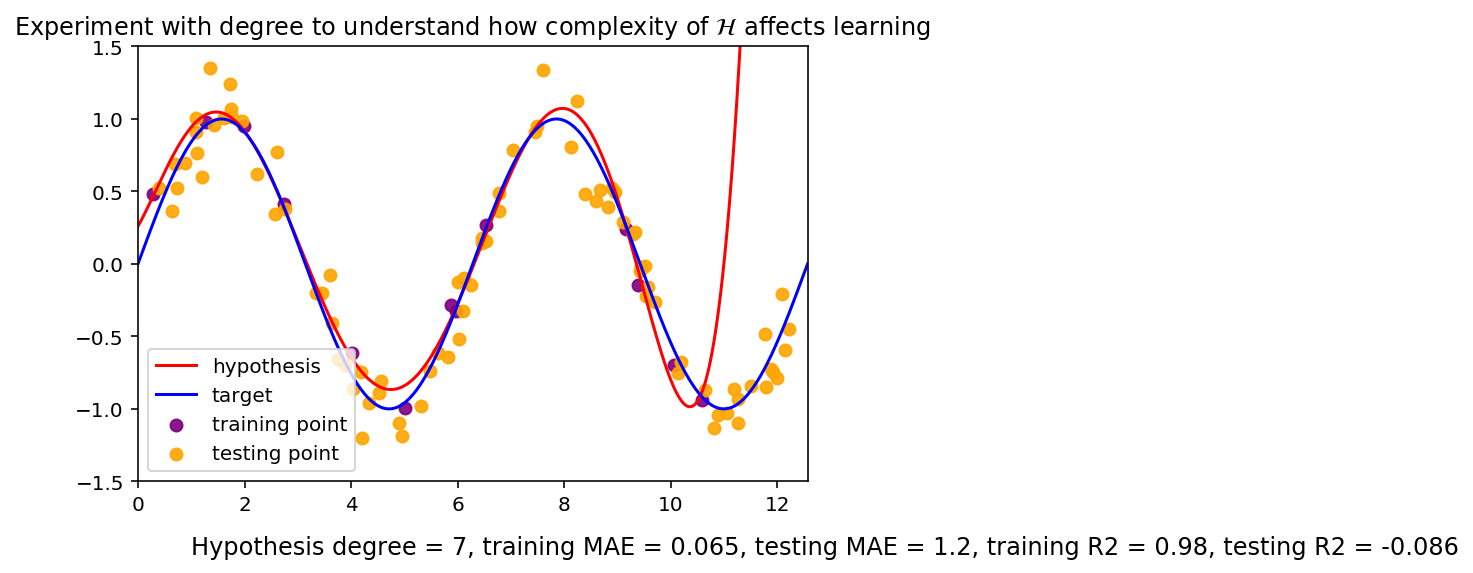

In [30]:


shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

deg = 7  ## The degree of the polynomials in the hypothesis space

noise = np.random.randn(N)
y = np.sin(x_pts) + noise/7
yy = np.sin(x)

X = np.ones(N*deg).reshape(N,deg)
for j in range(1,deg):
    X[:,j] = x_pts**j

X_train,X_test,y_train,y_test = test_train_split(X,y,0.13)




w = linear_fit(X_train,y_train)
g_train = linear_predict(X_train,w)
g_test = linear_predict(X_test,w)

xx = np.linspace(0,xmax,10000)
h = np.zeros(len(xx))
for j in range(deg):
    h += w[j]*xx**j

plt.plot(xx,h,label="hypothesis",c='red')

plt.plot(x,yy,label="target",c='blue')
plt.title(r"Experiment with degree to understand how complexity of $\mathcal{H}$ affects learning")
plt.scatter(X_train[:,1],y_train,c='purple',label="training point",alpha=0.9)
plt.scatter(X_test[:,1],y_test,c='orange',label="testing point",alpha=0.9)
plt.legend()

ymax = 1.5
ymin = -1.5#np.min(X[:,1])*1.15
plt.axis([xmin,xmax,ymin,ymax])
plt.text((xmax-xmin)//8,ymin*1.3,f"Hypothesis degree = {deg}, training MAE = {MAE(g_train,y_train):0.2}, testing MAE = {MAE(g_test,y_test):0.2}, training R2 = {R2(g_train,y_train):0.2}, testing R2 = {R2(g_test,y_test):0.2}", size=12, 
    verticalalignment='center')
plt.show()

### Learning Curves

In the above exercises we fixed a dataset and explored what happens as we vary the complexity of the hypothesis class $\mathcal{H}$.  

Now we will fix a hypothesis class $\mathcal{H}$ and explore what happens to training and testing error as the number of datapoints increases. This is known as a [Learning Curve](https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7).



8.640332735154744e-06
32963.007398781774
8.640332735154744e-06
27741.232843665293
0.00011555816883124237
7335.019657187601
0.00011555816883124237
7291.243347433517
27.319643648161968
1814.3927382246072
27.319643648161968
1593.376017989716
25.25237559324283
1751.221884770674
25.25237559324283
1667.1662694997945
26.77022786351077
583.8467765118676
26.77022786351077
850.1109907427872
32.74064628499231
849.9077413418133
32.74064628499231
796.4336902364158
46.212260722195246
807.9538133633948
46.212260722195246
868.3766845444311
147.80398483445134
1039.751040789333
147.80398483445134
1031.0881844678552
158.453440809976
1197.2382798367294
158.453440809976
1129.660830533306
172.03261422438035
1228.8366384938197
172.03261422438035
1150.8203253064062
161.47039963849224
1160.9208899437267
161.47039963849224
1118.561744433464
161.49195020890173
1103.0465201150914
161.49195020890173
1040.3339105066302
196.27846217652953
1317.2318216392994
196.27846217652953
1298.0598473630516
251.28427775021615
10

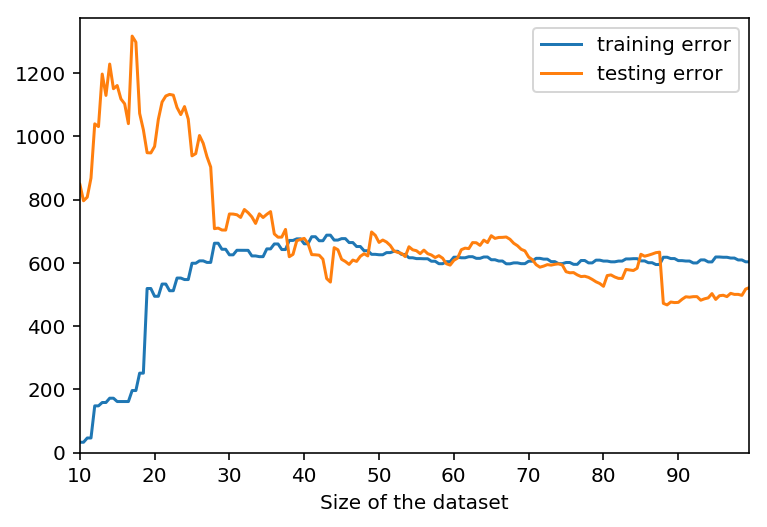

In [31]:
x = np.linspace(0,17*np.pi,2000)
N = 200
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

deg =6
X = np.ones(N*deg).reshape(N,deg)
for j in range(1,deg):
    X[:,j] = x_pts**j

shuff = np.random.permutation(N)
X = X[shuff]


noise = np.random.randn(N)
y = np.sin(x_pts)*x_pts**2 + noise
y2 = y[shuff]

values = []
for m in range(10,N):
    X_train = X[:int(m*0.5)]
    X_test = X[int(m*0.5):m]

    y_train = y2[:int(m*0.5)]
    y_test = y2[int(m*0.5):m]



    w = linear_fit(X_train,y_train)
    

    g_train = linear_predict(X_train,w)
    g_test = linear_predict(X_test,w)
    
    r_train = MAE(g_train,y_train)
    r_test = MAE(g_test,y_test)
    values.append([m,r_train,r_test])
    
values = np.array(values)
plt.plot(values[:,0]/2,values[:,1],label="training error")
plt.plot(values[:,0]/2,values[:,2],label="testing error")
xmin = np.min(values[:,0])
xmax = np.max(values[:,0])
ymin = 0
ymax = np.max(values[:,1])*2
plt.axis([xmin,xmax/2,ymin,ymax])
plt.xlabel("Size of the dataset")
plt.legend()
plt.show()


### That looks a bit rough...

The shape of the above curves depend on random choices and may not look quite like the ideal.

The picture should be approximately this:

![learning_curve](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGXPTiYYCNENLz2OgbP37y6ZwtOiSsSzoCyoT2DeYMzjMkM7ou8Q)

In the code below we average the above experiment over $K=200$ runs and get something that looks more appropriate.



In [32]:
K = 200
testvals = np.zeros((N-10)*K).reshape(K,N-10)
trainvals = np.zeros((N-10)*K).reshape(K,N-10)

for k in range(K):
    shuff = np.random.permutation(N)
    X = X[shuff]
    y = y[shuff]
    for m in range(10,N):
        X_train = X[:int(m*0.5)]
        X_test = X[int(m*0.5):m]

        y_train = y[:int(m*0.5)]
        y_test = y[int(m*0.5):m]




        w = linear_fit(X_train,y_train)


        g_train = linear_predict(X_train,w)
        g_test = linear_predict(X_test,w)
        
        r_train = RMSE(g_train,y_train)
        r_test = RMSE(g_test,y_test)
        testvals[k,m-10] = r_test
        trainvals[k,m-10] = r_train
testy = np.mean(testvals,axis=0)
trainy = np.mean(trainvals,axis=0)
plt.plot(np.arange(10,N)/2,trainy,label="training error")
plt.plot(np.arange(10,N)/2,testy,label="testing error")
xmin = 5
xmax = N/2+5
ymin = 0
ymax = np.max(trainy)*2
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel("Size of the dataset")
plt.ylabel("Error")
plt.legend()
plt.title("Learning Curve (RMSE)")
plt.show()

3.845176504473572e-07
1314.5947932816407
3.845176504473572e-07
1245.0394337700457
0.00015523968945892322
3160.3797501065937
0.00015523968945892322
3007.3439104888744
176.46402618254666
2598.7075673940585
176.46402618254666
2543.93503008508
350.9956519611266
2385.074873506733
350.9956519611266
2271.4390941674874
484.9867167364011
1347.4946484073753
484.9867167364011
1490.3946557814184
777.3256732036391
1245.664030366539
777.3256732036391
1296.4573487298383
744.3904721473415
1187.060606837639
744.3904721473415
1154.0945051246335
733.7593148966289
1217.6315815753242
733.7593148966289
1175.3936671288045
716.4028610696577
1252.86381574551
716.4028610696577
1302.5579023207558
694.9619719409415
1459.5978799854624
694.9619719409415
1410.2878084329993
746.4551123211793
1205.0866109608953
746.4551123211793
1171.765323443739
724.029446834513
1168.9287346471601
724.029446834513
1155.7217733348928
810.3110728482708
1275.7880206171885
810.3110728482708
1250.3099971925374
826.1274264244953
1179.90695

### Part 10

1. What does the learning curve look like when the hypothesis class is too complex for the target function and the amount of data?

When the hypothesis class is too complex for the target function and the amount of data, the learning curve looks going up and down, like shown above when the curves depended on random choices.

2. What does the learning curve look like when the hypothesis class is too simple for the target function and the amount of data?

When the hypothesis class is too simple, the curves will show higher error because there might not be a hypothesis that fits the function and amount of data.

3. What does the learning curve look like if the complexity of the hypothesis class is appropriate to the problem?

If the complexity of the hypothesis class is appropriate to the problem, the curves will be smoother like above when K = 200.

4. Why does test error go down and train error go up?
When it tests it on actual data, the algorithm will change itself to fit the data making the training error go up. Eventually, the algorithm tries to get to its desired performance.

### Regression meets classification

In this final section we connect regression and classification.  

First we reproduce the linearly separable dataset that we used in HW 2.

Then we embed that data in 3D space by making the $z$-coordinate of each data point 1 for positive examples, and -1 for negative examples.

Finally we fit this 3D data with a plane using linear regression.  

All of this is shown in the plot way down below.

#### Part 11

How can this regression plane $z = a+bx+cy$ be used to help classify new data points?

This regression plane can be used to classify new data points by separating them by -1 or 1. This causes them to be a different color on the grid and helps us discern data points by color. It may also help us find out where the line to separate the data should be.


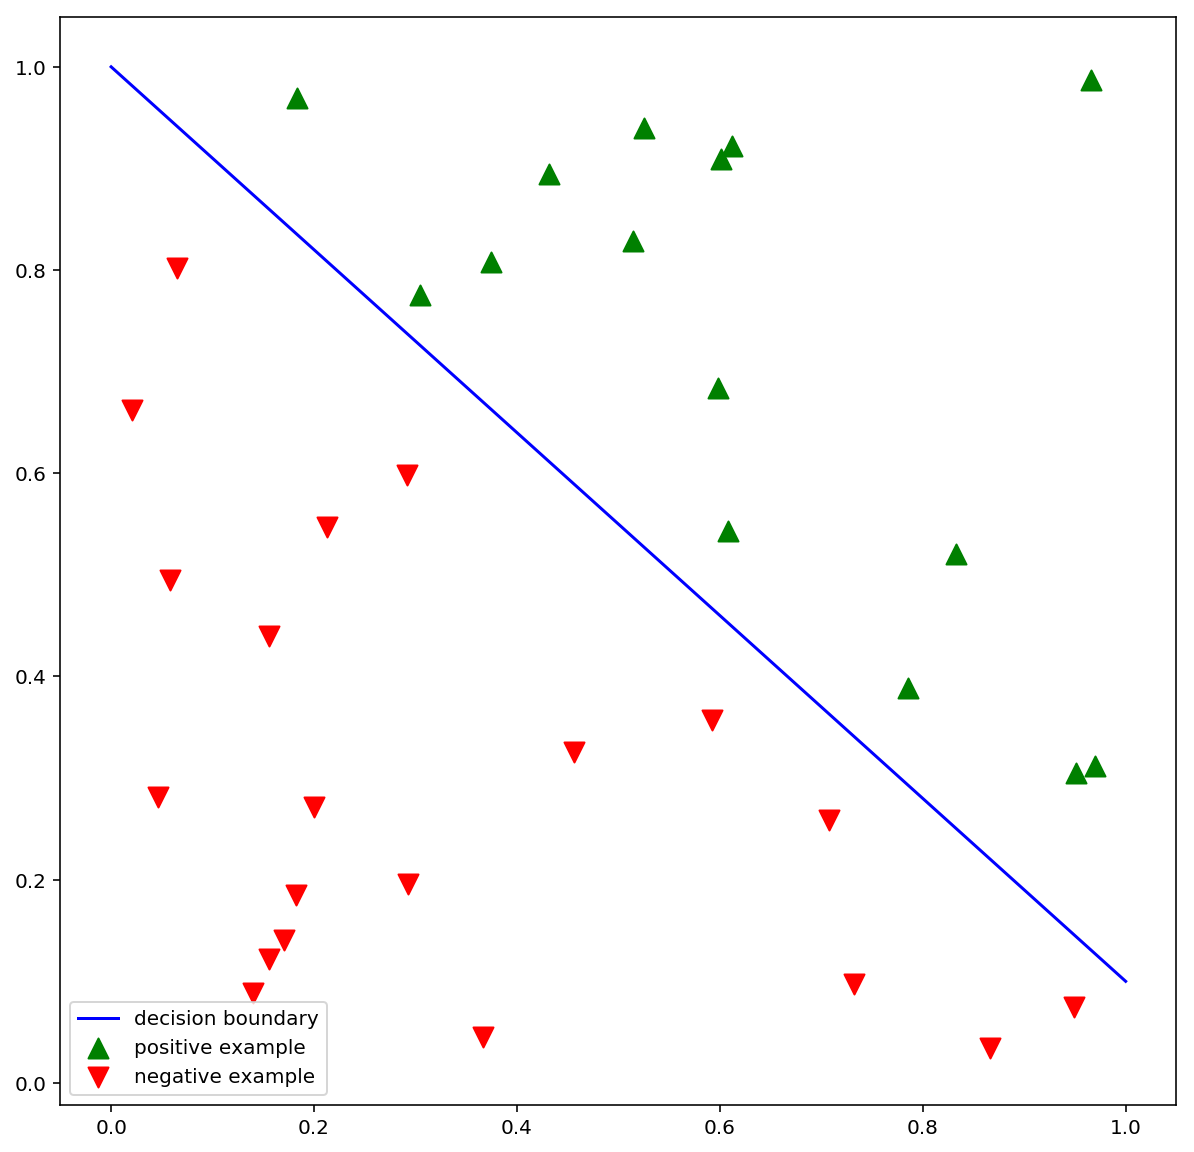

In [33]:
## Producing synthetic data
"""
In this cell we create 35 points at random.
We separate them with a line to create linearly separable data.
The data is stored in the points array.
Note that the first column of the points array is a "bias" column of all ones.
The "line _coef" (coefficients) variable works like this:
    if line_coef = (a,b,c)
    then this describes the line
    0 = a + bx + cy
This line can be thought of as the intersection of the plane
    z = a + bx + cy
with the xy plane.
Observe that in 
    0 = a + bx + cy
there are really only two degrees of freedom, because we can divide everything by c to get

    0 = A + Bx + y
where A = a/c and B = b/c.
(This assumes c != 0, but this assumption will almost always be true.)
"""

import numpy as np
import matplotlib.pyplot as plt

N = 35 # number of points
np.random.seed(42)  # So that everyone has the same "random" points
points = np.zeros(3*N).reshape(N,3)
points[:,1] = np.random.rand(N) #random x-coordinates
points[:,2] = np.random.rand(N) #random y-coordinates
points[:,0] = np.ones(N)        #bias column

line_coef = (-1,0.9,1)          #this line will define whether a point is a positive or negative example
pos = points.dot(line_coef) >= 0  # positive examples are above the line
neg = ~pos   # negative examples are below the line
"""
Question:  do you understand what pos and neg are, and how they work?
           you might want to print them out and experiment with them.
           we use them to select out certain rows of a numpy array.
           if this is confusing read the section here about 
           Boolean or "mask" index arrays:
           https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html
"""


x = np.linspace(0,1)                # domain of decision boundary line
y = -line_coef[1]*x - line_coef[0]  # this is the decision boundary line

"""
A note about colors... I used "green" for "positive example" and "red" for "negative example".
If you happen to be red green colorblind (like 8% of all men) then please feel free to change the colors.
"""

plt.figure(1,figsize=(10,10))
plt.scatter(points[pos,1],points[pos,2],c='green',marker="^",s=100,label="positive example")  #plot positive examples
plt.scatter(points[neg,1],points[neg,2],c='red',marker="v",s=100,label="negative example")  #plot negative examples
plt.plot(x,y,'b',label="decision boundary")  #plot linear separator
plt.legend()
plt.show()

In [34]:
y = np.ones(N)
y[neg] = -1
y[pos] = 1
X = points

w = linear_fit(X,y)
X.shape
Pos =X[pos]
Neg = X[neg]

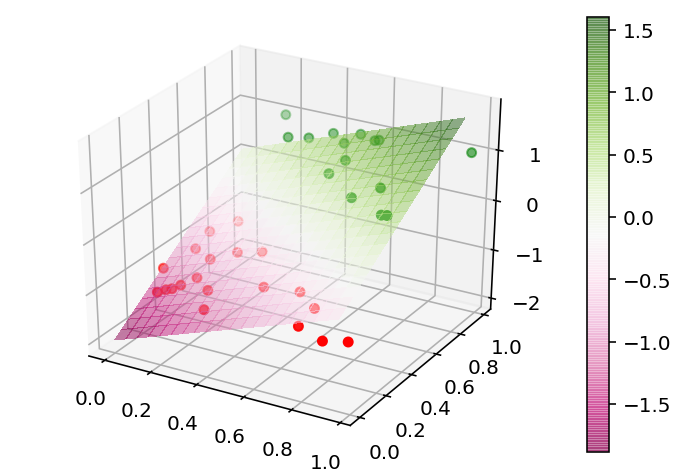

In [35]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
#ax = fig.gca(projection='3d')

ax = plt.axes(projection='3d')


# Make data.
XX = np.arange(0, 1, 0.05)
YY = np.arange(0, 1, 0.05)
XX, YY = np.meshgrid(XX, YY)

w = linear_fit(X,y)

Z = w[0]+w[1]*XX+w[2]*YY

surf = ax.plot_surface(XX, YY, Z, cmap=cm.PiYG,
                       linewidth=0, antialiased=False,alpha=0.5)
                       
                       
# Data for three-dimensional scattered points
zdata = np.ones(Pos.shape[0])
xdata = Pos[:,1]
ydata = Pos[:,2]
ax.scatter3D(xdata, ydata, zdata, c='green');

zdata = -1*np.ones(Neg.shape[0])
xdata = Neg[:,1]
ydata = Neg[:,2]
ax.scatter3D(xdata, ydata, zdata, c='red');
fig.colorbar(surf)
plt.show()